In [9]:
import math #importing math
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import requests as rq #dealing with http requests
import re #importing the regular expression package
import datetime as dt #importing dates and times
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import seaborn as sns

In [10]:
df= pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", skiprows =10) #creating the data frame

print(df.head(3))

  CATEGORY (i.e.ISCED description)  \
0      Business and administration   
1    Humanities (except languages)   
2                             Arts   

                                       COURSE TITLE COURSE CODE2 R1 POINTS  \
0                            International Business        AC120       209   
1                                      Liberal Arts        AC137       252   
2  First Year Art & Design (Common Entry,portfolio)        AD101  #+matric   

  R1 Random * R2 POINTS R2 Random*       EOS EOS Random * EOS Mid-point  ...  \
0         NaN       NaN        NaN       209          NaN           280  ...   
1         NaN       NaN        NaN       252          NaN           270  ...   
2         NaN       NaN        NaN  #+matric          NaN      #+matric  ...   

   avp    v Column1 Column2 Column3  Column4  Column5  Column6  Column7  \
0  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN      NaN   
1  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN 

In [11]:
df

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,LEVEL,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
count,1464.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.639344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.595939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(df.dtypes)

CATEGORY (i.e.ISCED description)     object
COURSE TITLE                         object
COURSE CODE2                         object
R1 POINTS                            object
R1 Random *                          object
R2 POINTS                            object
R2 Random*                           object
EOS                                  object
EOS Random *                         object
EOS Mid-point                        object
LEVEL                                 int64
HEI                                  object
Test/Interview #                     object
avp                                  object
v                                    object
Column1                             float64
Column2                             float64
Column3                             float64
Column4                             float64
Column5                             float64
Column6                             float64
Column7                             float64
Column8                         

In [18]:
df.iloc[73]

CATEGORY (i.e.ISCED description)                                            Education
COURSE TITLE                        Education, Home Economics and Biology - with c...
COURSE CODE2                                                                    AS001
R1 POINTS                                                                         510
R1 Random *                                                                       NaN
R2 POINTS                                                                         NaN
R2 Random*                                                                        NaN
EOS                                                                               518
EOS Random *                                                                      NaN
EOS Mid-point                                                                     544
LEVEL                                                                               8
HEI                                                   

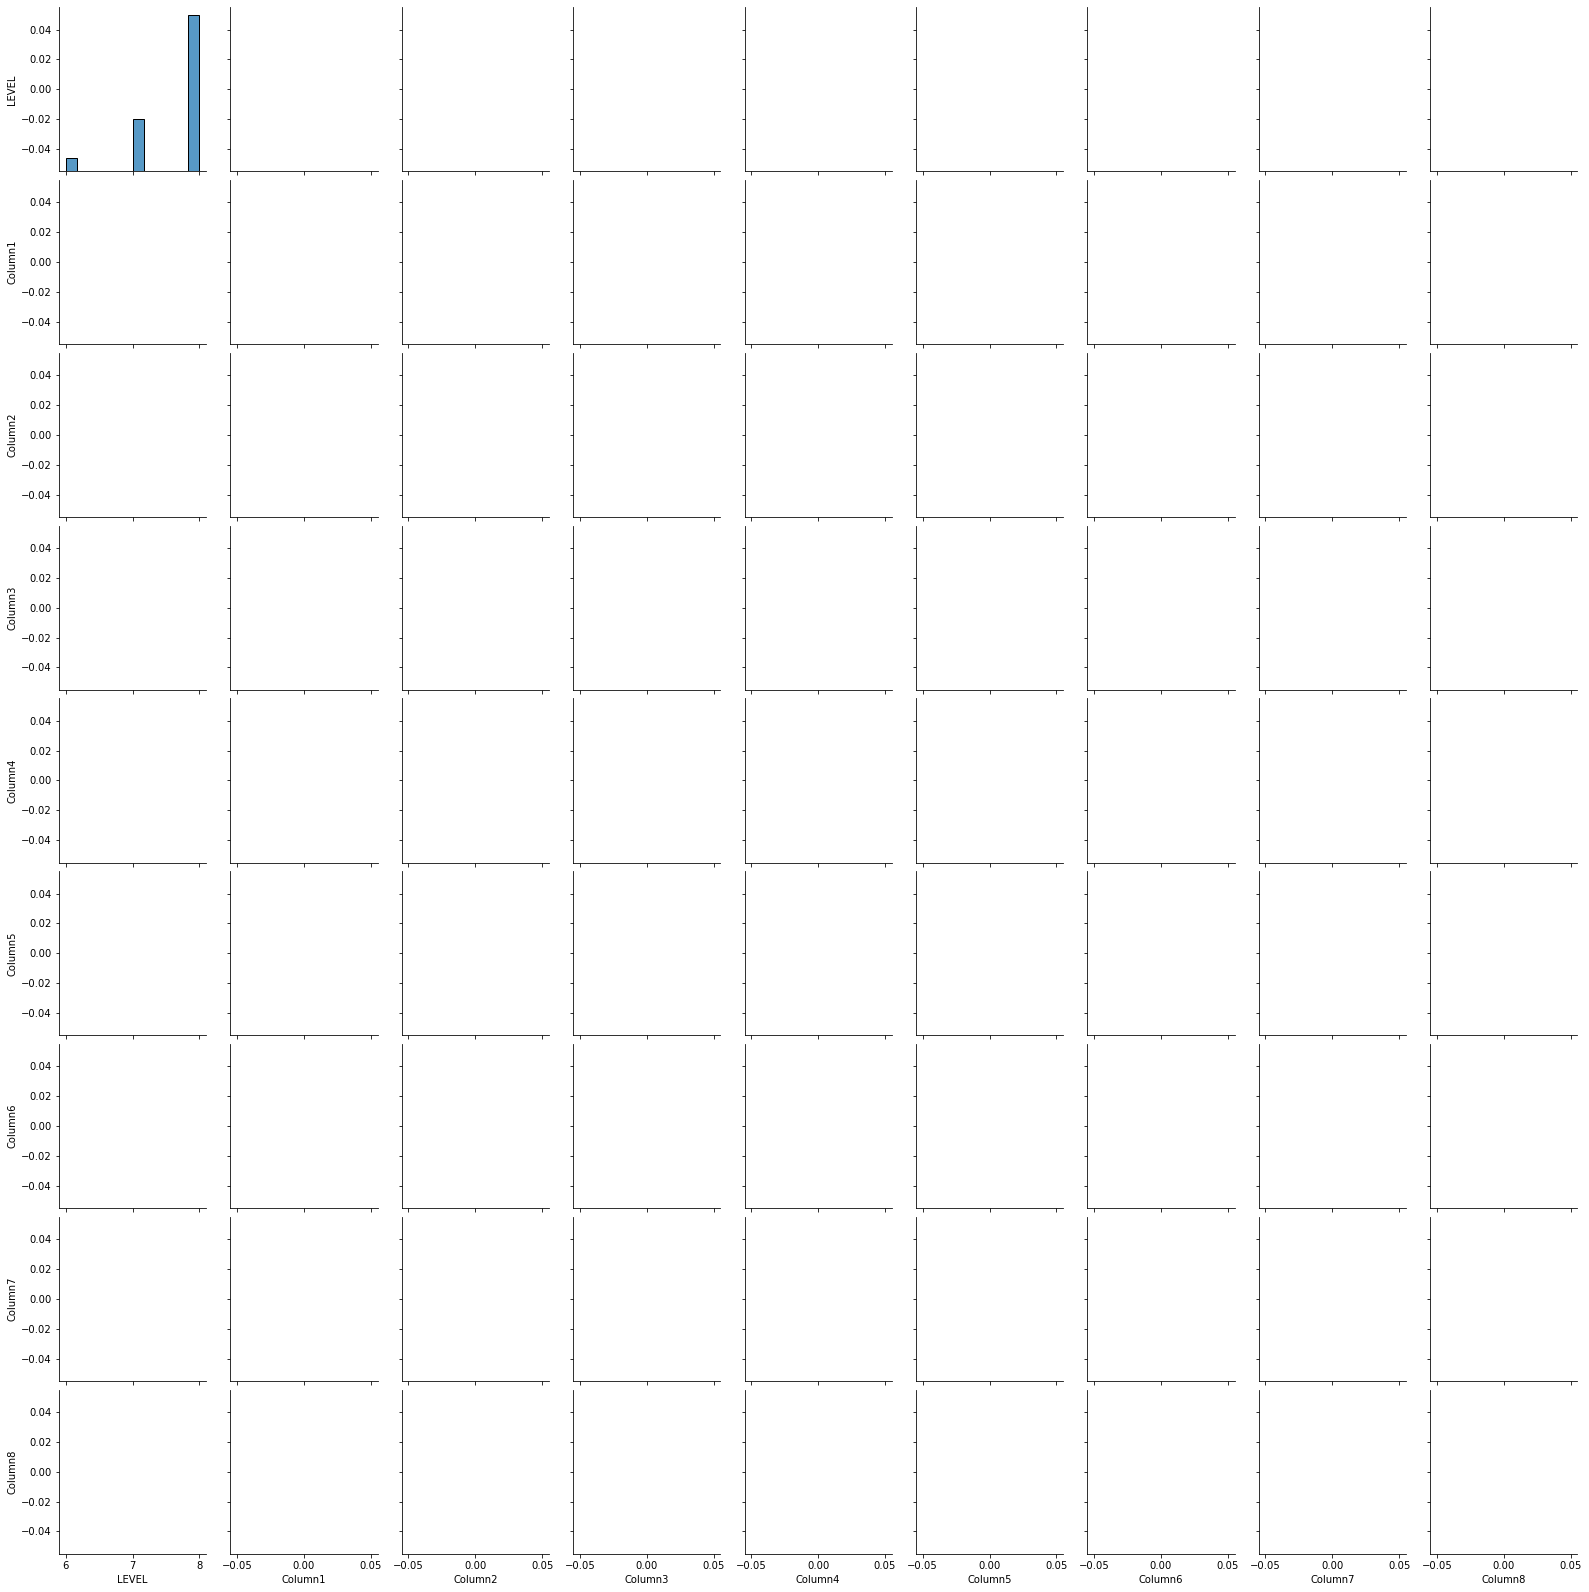

In [14]:
#sns.pairplot(df) #pairplot

In [15]:
#creating k neighbour

inputs = df[['a','b','c','d']]
outputs = df['x']

knn = nei.KNeighborsClassifier(n_neighbors =5) #classifier function, five closest neighbours

knn.fit(inputs, outputs) #visualise


knn.predict([[a]]) #predict


knn.predict(inputs) == outputs #checks if inputs equals outputs


(knn.predict(inputs) == outputs).sum() #sums up the trues



KeyError: "None of [Index(['a', 'b', 'c', 'd'], dtype='object')] are in the [columns]"

In [ ]:
mod.train_test_split(inputs, outputs, test_size = 0.33) #training model of 33% of the whole data set. 
inputs_train, inputs_test, outputs_train, outputs_test =mod.train_test_split(inputs, outputs, test_size = 0.33) 
inputs_train #look at this df